In [1]:
from tracr.rasp import rasp
from tracr.compiler import compiling
from tracr.compiler import lib

import sys
import os

# TODO: this is a hack, change this for editable install
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.model import Model
from src.functions import *

from src.loss import cross_entropy_loss, cross_entropy_loss_smoothed_accuracy, cross_entropy_loss_with_perfect_sequence

In [3]:
def test_loss_function(model_name: str, loss_fn, max_len: int = 10, n_samples: int = 5000, n_epochs: int = 50000, batch_size: int = 256, learning_rate: float = 1e-04, output_dir: str = None):
    model = generateModel(model_name, max_len)
    X, Y = generateAndEncodeData(model_name, max_len, n_samples, removeDuplicates=True)

    X_train = X[:int(0.85*len(X))]
    Y_train = Y[:int(0.85*len(Y))]
    X_val = X[int(0.85*len(X)):]
    Y_val = Y[int(0.85*len(Y)):]

    return model.train(X_train,Y_train, n_epochs, batch_size, learning_rate, False, X_val, Y_val, 0, 10, loss_fn=loss_fn, output_dir=output_dir)

In [ ]:
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed

def run_test(model_name, loss_fn_name, loss_fn):
    print(f"Testing {model_name} with {loss_fn_name}...")
    metrics, validation = test_loss_function(model_name, loss_fn, output_dir=f"saved_data/{model_name}/{loss_fn_name}/")
    return model_name, loss_fn_name, metrics, validation

# Define the number of worker threads
max_workers = 16  # Adjust this based on your system's capabilities

with ThreadPoolExecutor(max_workers=max_workers) as executor:
    futures = []
    for model_name in getAcceptedNamesAndInput().keys():
        print(f"Testing {model_name}...")
        for loss_fn_name, loss_fn in {
            "cross_entropy_loss": cross_entropy_loss,
            "cross_entropy_loss_smoothed_accuracy": cross_entropy_loss_smoothed_accuracy,
            "cross_entropy_loss_with_perfect_sequence": cross_entropy_loss_with_perfect_sequence
        }.items():
            future = executor.submit(run_test, model_name, loss_fn_name, loss_fn)
            futures.append(future)
    
    for future in as_completed(futures):
        model_name, loss_fn_name, metrics, validation = future.result()
        print(f"Completed {model_name} with {loss_fn_name}")
        # Process or store results as needed

Testing reverse...
Testing reverse with cross_entropy_loss...
Testing reverse with cross_entropy_loss_smoothed_accuracy...
Testing reverse with cross_entropy_loss_with_perfect_sequence...
Testing hist...
Testing hist with cross_entropy_loss...
Testing hist with cross_entropy_loss_smoothed_accuracy...
Testing hist with cross_entropy_loss_with_perfect_sequence...
Testing sort...
Testing sort with cross_entropy_loss...
Testing sort with cross_entropy_loss_smoothed_accuracy...
Testing sort with cross_entropy_loss_with_perfect_sequence...
Testing most-freq...
Testing most-freq with cross_entropy_loss...
Testing most-freq with cross_entropy_loss_smoothed_accuracy...
Testing most-freq with cross_entropy_loss_with_perfect_sequence...
Testing shuffle_dyck1...
Testing shuffle_dyck1 with cross_entropy_loss...
Testing shuffle_dyck1 with cross_entropy_loss_smoothed_accuracy...
Testing shuffle_dyck1 with cross_entropy_loss_with_perfect_sequence...Testing shuffle_dyck2...

Testing shuffle_dyck2 with 

  0%|          | 0/1 [00:00<?, ?it/s]


Testing shuffle_dyck2 with cross_entropy_loss_smoothed_accuracy...


100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Testing shuffle_dyck2 with cross_entropy_loss_with_perfect_sequence...


100%|██████████| 1/1 [00:10<00:00, 10.26s/it]


KeyboardInterrupt: 

100%|██████████| 1/1 [00:09<00:00,  9.33s/it]


In [16]:


def load_loss_function_results(model_name: str, loss_fn_name: str):
    metrics = np.load(f"saved_data/{model_name}/{loss_fn_name}/metrics.npy", allow_pickle=True)
    validation = np.load(f"saved_data/{model_name}/{loss_fn_name}/validations.npy", allow_pickle=True)
    return metrics, validation

def plot_metrics(metrics):
    plt.plot([m["step"] for m in metrics], [m["loss"] for m in metrics])
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

def plot_validation(validations):
    plt.plot(np.linspace(0, 50000, len(validations)), [m for m in validations])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy")
    plt.show()

def plot_loss_function_results(model_name: str, loss_fn_name: str):
    metrics, validation = load_loss_function_results(model_name, loss_fn_name)
    plot_metrics(metrics)
    plot_validation(validation)

Plotting reverse with cross_entropy_loss...


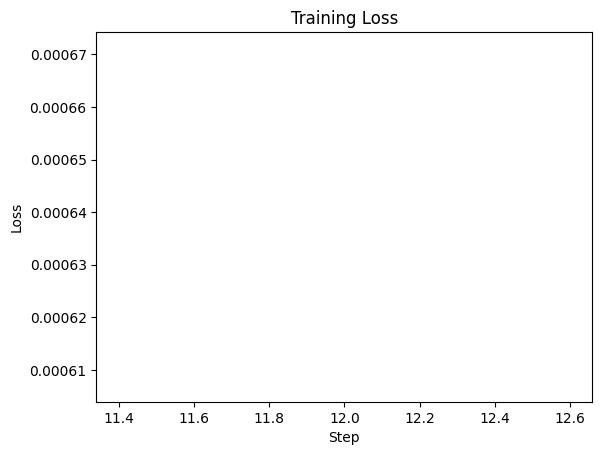

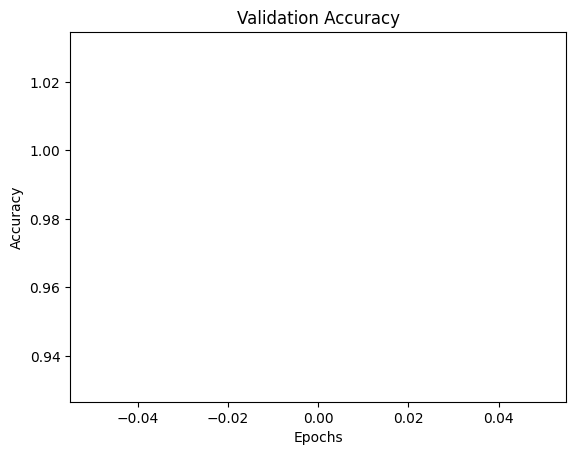

Plotting reverse with cross_entropy_loss_smoothed_accuracy...


FileNotFoundError: [Errno 2] No such file or directory: 'saved_data/reverse/cross_entropy_loss_smoothed_accuracy/metrics.npy'

In [17]:
for model_name in getAcceptedNamesAndInput().keys():
    for loss_fn_name, loss_fn in {
        "cross_entropy_loss": cross_entropy_loss,
        "cross_entropy_loss_smoothed_accuracy": cross_entropy_loss_smoothed_accuracy,
        "cross_entropy_loss_with_perfect_sequence": cross_entropy_loss_with_perfect_sequence
    }.items():
        print(f"Plotting {model_name} with {loss_fn_name}...")
        plot_loss_function_results(model_name, loss_fn_name)